In [1]:
using FastGaussQuadrature32

In [7]:
@time gaussjacobi(5, -0.5223, -0.2422)

elapsed time: 9.275e-5 seconds (16668 bytes allocated)


([-0.923201,-0.537519,0.0449258,0.611672,0.955766],[0.30638,0.496585,0.620566,0.708614,0.784348])

In [13]:
@time points, weights = gaussjacobi(5, -0.423, -0.5)
@time integral = sum(weights .* cosh(points))

elapsed time: 9.7389e-5 seconds (15220 bytes allocated)
elapsed time: 2.3165e-5 seconds (416 bytes allocated)


3.7778183615721987

In [14]:
angles = [0.5, 0.5, 0.5, 0.5];
prevertices = [-5.0, -1.0, 1.0, 5.0];
vertices = [0.0 + 0.0im, 1.0 + 0.0im, 1.0 + 1.0im, 0.0 + 1.0im];

In [24]:
function one_to_two(prevertices)
    points, weights = gaussjacobi(5, -angles[1], -angles[2])
    function integrand(x)
        prod( abs(x*ones(2) - prevertices[3:4]).^(-angles[3:4]) )
    end
    integral = sum( weights .* [integrand(point) for point in points])
end

one_to_two (generic function with 2 methods)

In [141]:
function compute_lengths(prevertices)
    quad_order = 5;
    n_intervals = length(prevertices) - 2;
    points = zeros(n_intervals, quad_order);
    weights = zeros(n_intervals, quad_order);
    lengths = zeros(n_intervals);
    for i=1:n_intervals
        points[i,:], weights[i,:] = gaussjacobi(quad_order, -angles[i], -angles[i+1]);
        scaling_factor = (prevertices[i+1] - prevertices[i])/2.0;
        interval_center = (prevertices[i+1] + prevertices[i])/2.0;
        point_values = [ prod( [ abs( scaling_factor*points[i,j] + interval_center - prevertices[k])^(-angles[k])
                for k in [(1:(i-1))' (i+1:length(prevertices))'] ] )
            for j in 1:quad_order ];
        lengths[i] = scaling_factor*sum( weights[i,:] .* point_values )
    end
    lengths
end

compute_lengths (generic function with 1 method)

In [142]:
function normalized_lengths(prevertices)
    lens = compute_lengths(prevertices)
    lens[2:length(lens)]/lens[1]
end

normalized_lengths (generic function with 2 methods)

In [181]:
@time normalized_lengths([-1.192501, 0.0, 1.0, 2.0])[1]

elapsed time: 0.000235092 seconds (9944 bytes allocated)


0.9999938416031133

In [182]:
compute_lengths([-1.192501, 0.0, 1.0, 2.0])

2-element Array{Float64,1}:
 12.5059
 12.5058

In [315]:
function schmap(vertices, angles, prevertices, z)
    quad_order = 20;
    base_index = indmin(abs(real(z) - prevertices));
    points, weights = gaussjacobi(quad_order, -angles[base_index], 0.0);
    scaling_factor = (z - prevertices[base_index])/2.0
    interval_center = (z + prevertices[base_index])/2.0
    extra_angle = (-1.0 + 0.0im)^(-prevertices[base_index])
    point_values = [ prod([ (scaling_factor*points[j] + interval_center - prevertices[k])^(-angles[k])
            for k in [(1:(base_index-1))' ((base_index+1):length(prevertices))'] ]) 
        for j in 1:quad_order]
    vertices[base_index] + scaling_factor * extra_angle * sum(weights .* point_values)
end

schmap (generic function with 2 methods)

In [243]:
function schmap_basic(prevertices, z)
    quad_order = 5;
    base_index = indmin(abs(real(z) - prevertices));
    points, weights = gaussjacobi(quad_order, 0.0, 0.0);
    scaling_factor = (z - prevertices[base_index])/2.0
    interval_center = (z + prevertices[base_index])/2.0
    point_values = [ prod([ (scaling_factor*points[j] + interval_center - prevertices[k])^(-angles[k])
            for k in 1:length(prevertices) ]) 
        for j in 1:quad_order]
    vertices[base_index] + scaling_factor * sum(weights .* point_values)
end

schmap_basic (generic function with 1 method)

In [312]:
Z = linspace(-10,-0.8,100) * ones(100)' + 1.0im*ones(100) * linspace(0.001, 60,100)';

In [316]:
W = reshape([ schmap([0.0+0.0im, 1.0+0.0im, 0.0+1.0im], [0.5, 0.75, 0.75], [0.0, 1.0, 2.0], Z[i]) for i=1:length(Z)],(100,100));

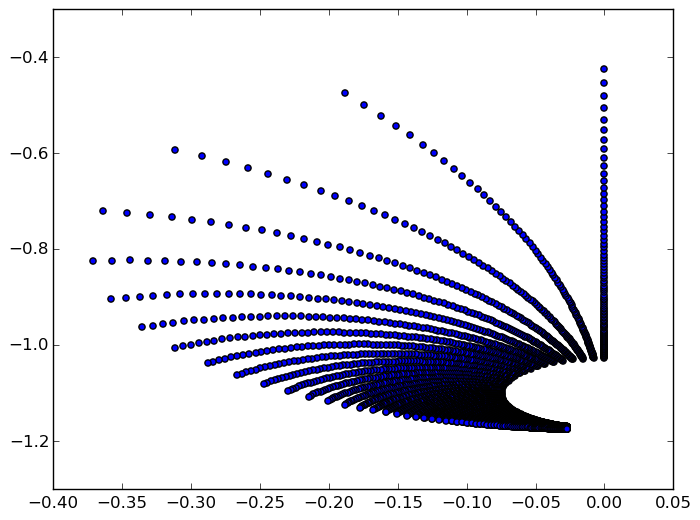

PyObject <matplotlib.collections.PathCollection object at 0xa74d9fac>

In [317]:
scatter(real(W),imag(W))

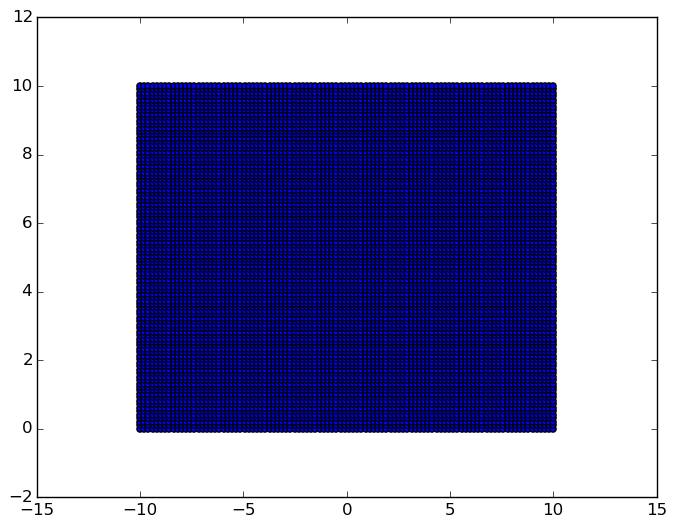

PyObject <matplotlib.collections.PathCollection object at 0xb5f1fa0c>

In [210]:
scatter(real(Z),imag(Z))

In [254]:
function christoffel(prevertices, z)
    function integrand(x)
        prod((x - prevertices).^(-angles))
    end
    quadgk(integrand,0,z)[1]
end

christoffel (generic function with 1 method)

In [255]:
christoffel([-1.192501, 0.0, 1.0, 2.0], 2.0+1.0im)

-1.3913719006483563 - 1.2582518321922502im

In [287]:
domain = linspace(-10,10,20) * ones(20)' + 1.0im*ones(20) * linspace(0.1, 20,20)';

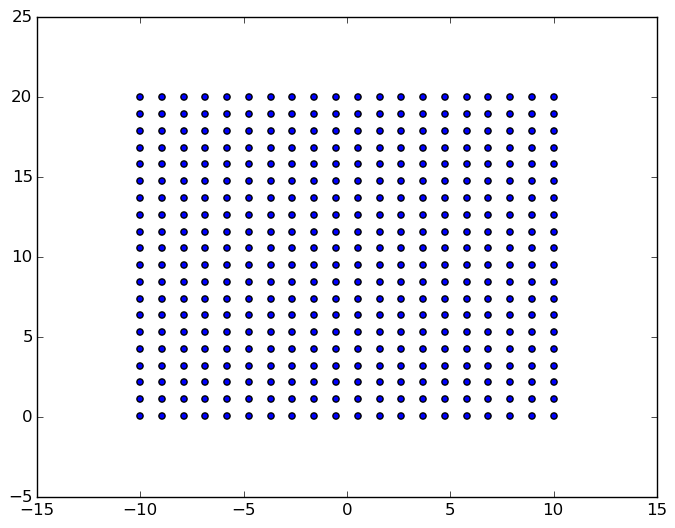

PyObject <matplotlib.collections.PathCollection object at 0xa81c408c>

In [288]:
scatter(real(domain), imag(domain))

In [292]:
z = 1.0 + 2.0im
function square(z)
    quadgk(ζ -> 1.0/sqrt( (ζ.^2 - 1.0).*ζ), 0, z)[1]
end

square (generic function with 1 method)

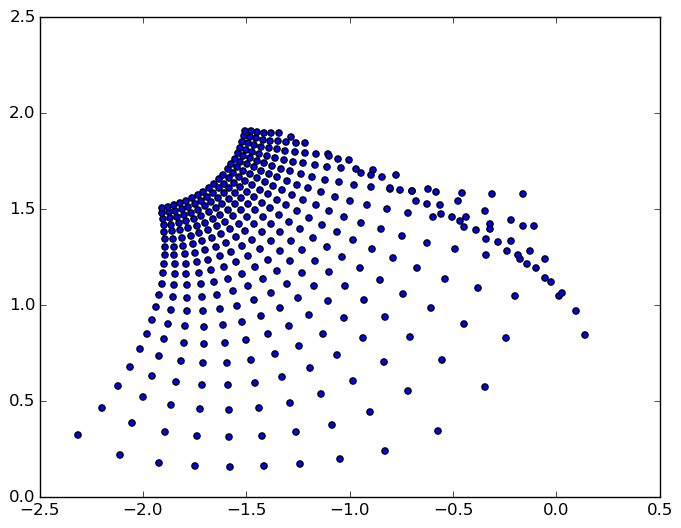

PyObject <matplotlib.collections.PathCollection object at 0xa7811a2c>

In [306]:
D = [square(z) for z in linspace(-1,1,20)*ones(20)' + 1.0im*ones(20)*linspace(0.1,2.0,20)' ];
scatter(real(D), imag(D))

In [293]:
C = [square(z) for z in domain];

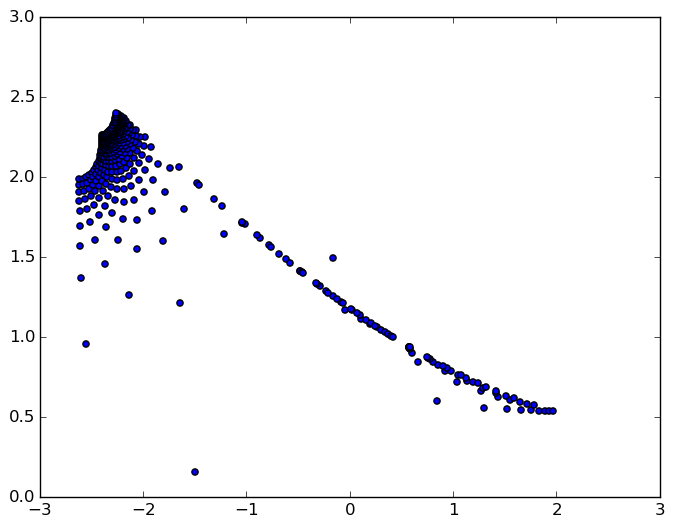

PyObject <matplotlib.collections.PathCollection object at 0xa796f48c>

In [294]:
scatter(real(C), imag(C))

In [310]:
scatter(real(asin(D)),imag(asin(D)))

LoadError: `asin` has no method matching asin(::Array{Any,1})
while loading In[310], in expression starting on line 1